# Supervised Learning Models

In this notebook, we present a series of experiments to compare different models that rely on supervised learning for a classification task. 

We will rely on a dataset that contains instances of **UK Traffic Accidents** to attempt to **classify an accident as severe or non-severe given the relevant features in the dataset**. For more details on the preparation of the dataset used here consult the [dataset_prep notebook](dataset_prep.ipynb).

Before evaluating different models, we will introduce the metrics that will be utilized by this purpose. 
We will also present the definition of the concepts of cross validation and grid search, which will also be used to evaluate the studied models.

## Classification Task Metrics

In this section we present the metrics that will be utilized to compare the different models for classification.

**Note:** For more details on the definition of the metrics presented below refer to the scikit learn documentation: [sklearn.metrics Documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

To better understand these metrics, we are going to consider a very simple example related to a classification task. Let's say we have a model trained to identify if the animal in a given picture is or not a dog. The model is evaluated with 100 pictures, from which 40 do contain a dog and 60 do not. From the 40 pictures with a dog, the algorithm correctly classifies 35 of them as containing a dog. From the 60 that do not contain a dog, the algorithm incorrectly classisifes 10 of them as containing a dog.

* 100 pictures
  * 40 have a dog.
    * Model predicts 35 as having a dog.
    * Model predicts 5 as not having a dog.
  * 60 do not have a dog.
    * Model predicts 10 as having a dog.
    * Model predicts 50 as not having a dog.


### Classification Accuracy

The simplest and most widely used method. Represents the ratio of correct to the total number of predictions. Normally presented as a percentage:

$$Accuracy (\%) = 100 * \frac{correct\_predictions}{total\_predictions}$$

For our example scenario, the accuracy would be calculated as below:

$$Accuracy (\%) = 100 * \frac{35 + 50}{100}$$
$$Accuracy = 85\%$$

### Confusion Matrix

A matrix or table that aids visualizing the accuracy of the classification by comparing the *'Truth'* values against the predictions done by the model in a row against column comparison. This will be better understood with the data of our example scenario.

In the rows, we will present the count of predictions done by the model for each of the categories. For the columns, we will present the *'Truth'* count for each of them.

|                        | non-dog Truth | dog Truth |
|------------------------|---------------|-----------|
| **non-dog prediction** |       50      |     5     |
| **dog  prediction**    |       10      |     35    |

A Confusion Matrix from a good classifier will have high numbers in the main diagonal (correct classifications) and low numbers elsewhere. 

### Sensitivity, Recall or True Positive Rate

Aids determining the ability of the model to correctly identify *'True'* values correctly in binary classifications. It can be calculated as the ratio of *'True'* values classified as such (true_positives) to the total number of *'True'* values (true_positives and false_negatives).

Normally presented as a percentage:

$$Sensitivity (\%) = 100 * \frac{true\_positives}{true\_positives + false\_negatives}$$

For our example scenario, the sensitivity would be calculated as below:

$$Sensitivity (\%) = 100 * \frac{35}{35 + 5}$$
$$Sensitivity = 87.5\%$$


### Specificity or True Negative Rate

Aids determining the ability of the model to correctly identify *'False'* values correctly in binary classifications. It can be calculated as the ratio of *'False'* values classified as such (true_negatives) to the total number of *'False'* values (true_negatives and false_positives).

Normally presented as a percentage:

$$Specificity (\%) = 100 * \frac{true\_negatives}{true\_negatives + false\_positives}$$

For our example scenario, the specificity would be calculated as below:

$$specificity (\%) = 100 * \frac{50}{50 + 10}$$
$$specificity = 83.3\%$$


### Precision

It represents the ratio of results correctly identified as *'True'* values to the total number of values classified as *'True'* by the model.

Normally presented as a percentage:

$$Precision (\%) = 100 * \frac{true\_positives}{true\_positives + false\_positives}$$

For our example scenario, the precision would be calculated as below:

$$Precision (\%) = 100 * \frac{35}{35 + 10}$$
$$Precision = 77.8\%$$

### F1 Score

It aids combining the Precision and Recall into a single metric as a harmonic mean of them.

Normally presented as a percentage:

$$F1(\%) = 100 * 2 * \frac{precision * recall}{precision + recall}$$

For our example scenario, the F1-score would be calculated as below:

$$F1 (\%) =  2 * \frac{77.8 * 87.5}{77.8 + 87.5}$$
$$F1 = 82.4\%$$

### Training and Prediction Time

Depending on the application and computational resources available, we may also care about the time it takes to train or fit a model with a given dataset (training time). The prediction time represents the time it takes the model to generate a prediction given a set of features. This latter is typically given for the entire block of instances in the dataset used for testing.

## Cross Validation and Grid Search

Below we present the definition of these concepts, which will be used while evaluating our learning models. For more information, consult the resources below:

[Cross Validation and Grid Search for Model Selection in Python](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/)\
[Cross Validation and Grid Search](https://amueller.github.io/ml-training-intro/slides/03-cross-validation-grid-search.html#1)\
[Cross-Validation and Hyperparameter Tuning: How to Optimise your Machine Learning Model](https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d)\

### Cross Validation

With the standard method, we select a fixed portion of the dataset which is used for testing while the rest is used for training. One potential problem with this approach is that our evaluation is heavily dependent on that fixed selection of the training and testing buckets. With this we have less confidence that our model will perform well when this selection changes.

To deal with this potential problem, cross validation techniques propose evaluating the model with different partitions of the dataset to obtain a better understanding of its ability to generalize. 

The most common technique of this type is known as *K-Fold Cross-Validation*. The process followed with this technique is explained below:

1. The dataset is divided into $k$ groups or folds of equal size.
2. Use $k-1$ of the groups to train the algorithm.
3. Use the remaining group (not used for training) to validate the trained model. Obtain the accuracy and other metrics as needed.
4. Repeat steps 2 and 3 rotating the selection until all the $k$ groups have been used at least once for evaluation.
5. Obtain an average of the accuracy and other metrics used for all the runs. We can also obtain standard deviations to see how stable the model is against these changes.

The image shown below represents this process.

![cross_validation](images/cross_validation.svg "K-Fold Cross Validation")
<center>Image Source: Wikipedia</center>

### Grid Search

As it is already known, most of the models for supervised learning have different hyper-parameters used during the training process that end-up affecting the final performance obtained in the predictions. For example, we require to choose an appropriate number of neighbors to use for a *KNN* model, a regularization value for a *SVM* model, a maximum depth for a *Binary Tree* model, etc. When using grid-search, we will configure an automated algorithm to sweep and combine a series of hyper-parameters that we define, in an attempt to search for the values that would yield better results. 

For example, let's say we have a model that has 2 hyper-parameters used for training called *A* and *B*. *A* is an integer number that can range from 1 to infinite and *B* is a categorical value with 5 different potential values. Let's say we are interested in attempting all the potential values for *B* and only the next values for *A*:

$$A=\{10, 30, 50, 70, 90\}$$

Since we have 5 potential values for *A* and 5 potential values for *B*, the grid search will train and evaluate our algorithm with 25 different combinations in an attempt to find the best among them. As it can be seen, this type of technique will significantly increase the training time.

It is worth mentioning that although cross-validation and grid-search are independent and can be used by themselves, they are particularly powerful when used together.

## Learning Models Evaluation

In this section we present the results of evaluating different learning models for a classification task. More specifically, we will utilize the already processed **UK Accidents Dataset** to attempt to classify an accident as severe or non-severe given the relevant features in the dataset. 

Below we list the classification methods studied in class:

- Logistic Regresion\.
- SVM\.
- kNN\.
- Naive Bayes\.
- Decision Trees\.
- Random Forest\.
- Kernel SVM\.

From these methods we have decided to evaluate *Logistic Regresion*, *SVM*, *Naive Bayes*, *Decision Trees* and *Random Forest*. 

Initially, we discard *kNN* since it can become slow for a relatively big dataset like this one and it might not behave as well since we also have many features (58 in this case). We also discard the *Kernel SVM*, since even through it may provide good predictions, it will also be significantly slower to train given the considerable amount of instances and features.

Besides these models, we will also evaluate the **WHICH ONE** algorithm which was not studied in class. The details of this algorithm are presented in its corresponding section.

For all the algorithms evaluated, we will initially use only cross validation with 5-folds and a metric of accuracy to determine the results. After this, we will combine cross-validation with grid search to attempt to obtain better values for the hyper-parameters. We will present the results of accuracy, confusion matrix, recall, specificity, precision and F1-score for the best configuration obtained for each of the algorithms. 

### Loading the Dataset

Below we start by importing some of the main python packages that will be used and also by loading the dataset.

In [1]:
# Start by importing relevant python modules
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
# Load accidents Dataset
df_accidents = pd.read_csv('dataset/uk_accidents_for_sev_prediction.csv')

Below we proceed to shuffle the instances to ensure both classes (severe and non-severe) are well distributed.

In [3]:
from sklearn.utils import shuffle
df_accidents = shuffle(df_accidents, random_state=0)

We also proceed to separate the features and target columns into separate data-frames.

In [4]:
# Separate features and target columns
features = df_accidents.drop('Severe_Accident', axis=1)
target = df_accidents['Severe_Accident']

Below we define some generic functions that will be used to evaluate the results of the different models.

In [35]:
def plot_cv_results(cv_results, clf_model):
    """Plot results for cross-validation of classifier."""
    # Create figure with 2 subplots
    fig, (acc_plot, time_plot) = plt.subplots(2, 1)
    fig.suptitle("Cross-Validation Results for '{}'".format(clf_model))
    
    # Create subplot with Accuracy Scores for training and test
    acc_plot.plot(100 * cv_results['train_score'],label='Train Score')
    acc_plot.plot(100 * cv_results['test_score'],label='Test Score')
    acc_plot.set_xlabel("Iteration")
    acc_plot.set_ylabel("Accuracy (%)")
    acc_plot.legend()
    
    # Create subplot with Execution Times
    time_plot.plot(cv_results['fit_time'],label='Training Time')
    time_plot.plot(cv_results['score_time'],label='Testing Prediction Time')
    time_plot.set_xlabel("Iteration")
    time_plot.set_ylabel("Time (s)")
    time_plot.legend()
    
    # Display
    plt.show()
    

def cross_validation(clf_model, k=5, return_estimators=False):
    """Perform cross-validation with the given clf_model and report results."""
    print("-----------------------------------------------------------------------------------------")
    # Run CV
    print(" >>> Running Cross-Validation for model '{}' ...".format(clf_model))
    cv_results = cross_validate(estimator=clf_model, X=features, y=target, cv=k, 
                                scoring='accuracy', return_train_score=True, return_estimator=return_estimators)
    # Generate Plots with Key Results
    plot_cv_results(cv_results, clf_model)
    
    # Print results summary
    print("[Testing]  Accuracy Mean       (%) = {:.3f}".format(100 * cv_results['test_score'].mean()))
    print("[Testing]  Accuracy Std Dev    (%) = {:.3f}".format(100 * cv_results['test_score'].std()))
    print("[Testing]  Execution Time Mean (s) = {:.3f}".format(cv_results['score_time'].mean()))
    print("[Training] Execution Time Mean (s) = {:.3f}".format(cv_results['fit_time'].mean()))
    print("-----------------------------------------------------------------------------------------")
    
    if return_estimators:
        return cv_results['estimator']
    
    
def grid_search_cv(clf_model, param_grid, k=5):
    """Perform grid search with CV for given classifier model and parameters grid and report results."""
    print(" >>> Running Grid-Search with CV for model '{}' ...".format(clf_model))
    # Configure GS
    gs = GridSearchCV(estimator=clf_model, param_grid=param_grid, scoring='accuracy', cv=k, verbose=1)
    # Fit on data
    gs.fit(features, target)
    # Print key results
    print(" << Grid-Search Results >>")
    print("Best Parameters Combination: {}".format(gs.best_params_))
    print("Best Accuracy Score:         (%) = {:.3f}".format(100 * gs.best_score_))
    
    return gs.best_estimator_


def seaborn_confusion_matrix(cm, model_name):
    """Generate figure with seaborn confusion matrix."""
    # Create new figure
    plt.figure(figsize=(7,7))
    # We will have custom label for each box with count and percentage
    all_counts = [count for count in cm.flatten()]
    all_percentages = ["{:.3f} (%)".format(100 * perc) for perc in cm.flatten()/np.sum(cm)]
    labels = [f"{count}\n{perc}" for count, perc in zip(all_counts, all_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # Generate heatmap
    tick_labels = ['Non-Severe', 'Severe']
    sns.heatmap(cm, annot=labels, square=True, fmt="", cmap='Reds', 
                xticklabels=tick_labels, yticklabels=tick_labels);
    plt.ylabel('Actual');
    plt.xlabel('Predicted');
    plt.title("Confusion Matrix for model {}".format(model_name), size = 12);
    plt.show()


def generate_metrics(clf_model, model_name: str):
    """Evaluate model and return different metrics in dictionary."""
    # Start by obtaining a portion of the dataset used for the testing
    _, X_test, _, y_test = train_test_split(features, target, test_size=0.2, random_state=8)
    
    # Now perform prediction with the already trained classifier
    y_predicted = clf_model.predict(X_test)
    
    # We are ready to obtain metrics which will be stored in a dict
    metrics_dict = {'Model Name': model_name}
    metrics_dict['Accuracy (%)'] = 100 * metrics.accuracy_score(y_test, y_predicted)
    cm = metrics.confusion_matrix(y_test, y_predicted)
    metrics_dict['Recall (%)'] = 100 * metrics.recall_score(y_test, y_predicted)
    metrics_dict['Specificity (%)'] = 100 * cm[0, 0] / (cm[0, 0] + cm[0, 1])
    metrics_dict['Precision (%)'] = 100 * metrics.precision_score(y_test, y_predicted)
    metrics_dict['F1 Score (%)'] = 100 * metrics.f1_score(y_test, y_predicted)
    
    # Create figure with confusion matrix created with seaborn
    seaborn_confusion_matrix(cm, model_name)
    
    return metrics_dict


def create_metrics_table(metrics_dicts):
    """Create table with metrics from provided list of dictionary with results."""
    df_table = pd.DataFrame(metrics_dicts)
    df_table = df_table.round(3)
    return df_table
    

### Logistic Regression

In [6]:
# Import linear_model module
from sklearn import linear_model

-----------------------------------------------------------------------------------------
 >>> Running Cross-Validation for model 'LogisticRegression(random_state=8, solver='liblinear')' ...


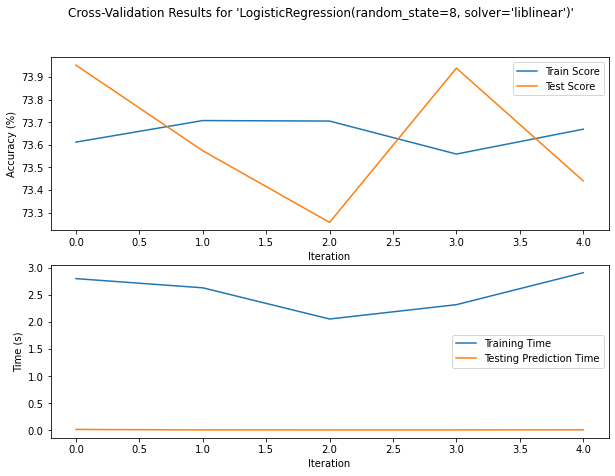

[Testing]  Accuracy Mean       (%) = 73.633
[Testing]  Accuracy Std Dev    (%) = 0.275
[Testing]  Execution Time Mean (s) = 0.009
[Training] Execution Time Mean (s) = 2.546
-----------------------------------------------------------------------------------------


In [7]:
# Configure Logistic Regression model and invoke cross_validation function
lr_clf = linear_model.LogisticRegression(solver='liblinear', random_state=8)
cross_validation(lr_clf)

In [9]:
# Now let's use Grid-Search to attempt to find a good combination of hyper-parameters
lr_param_grid = {
    'solver': ['liblinear', 'sag', 'newton-cg'],
    'C': [0.1, 1, 10, 15],
    'random_state': [8]
}
lr_clf = linear_model.LogisticRegression()
best_lr_clf = grid_search_cv(lr_clf, lr_param_grid)

 >>> Running Grid-Search with CV for model 'LogisticRegression()' ...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/agomez/miniconda3/envs/patterns_class/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/agomez/miniconda3/envs/patterns_class/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/agomez/miniconda3/envs/patterns_class/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/agomez/miniconda3/envs/patterns_class/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

 << Grid-Search Results >>
Best Parameters Combination: {'C': 10, 'random_state': 8, 'solver': 'newton-cg'}
Best Accuracy Score:         (%) = 73.642


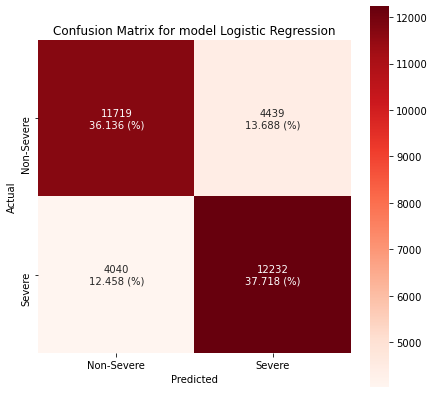

,Model Name,Accuracy (%),Recall (%),Specificity (%),Precision (%),F1 Score (%)
0,Logistic Regression,73.854,75.172,72.528,73.373,74.262


In [36]:
# Now let's generate metrics results for the best model obtained
best_lr_clf_metrics = generate_metrics(best_lr_clf, "Logistic Regression")
create_metrics_table([best_lr_clf_metrics])

### Naive Bayes

In [24]:
# Import naive_bayes module
from sklearn import naive_bayes

In [ ]:
# Configure Gaussing Naive-Bayes model and invoke cross_validation function
nb_clf = naive_bayes.GaussianNB()
cross_validation(nb_clf)

### Decision Trees

In [21]:
# Import tree module
from sklearn import tree

-----------------------------------------------------------------------------------------
Running Cross-Validation for model 'DecisionTreeClassifier(max_depth=8, random_state=8)' ...


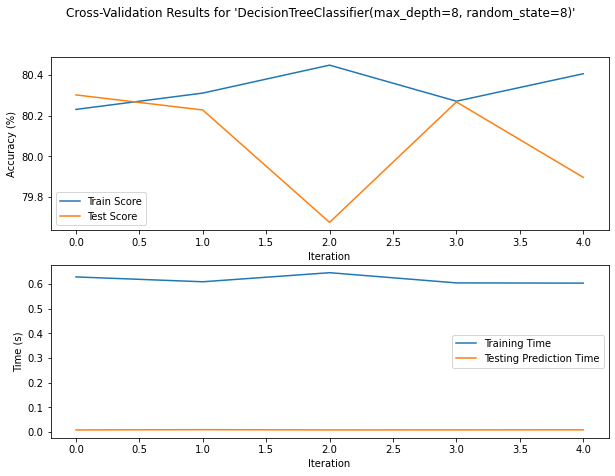

[Testing]  Accuracy Mean       (%) = 80.074
[Testing]  Accuracy Std Dev    (%) = 0.246
[Testing]  Execution Time Mean (s) = 0.009
[Training] Execution Time Mean (s) = 0.618
-----------------------------------------------------------------------------------------


In [26]:
# Configure Binary Tree model and invoke cross_validation function
bt_clf = tree.DecisionTreeClassifier(max_depth=8, random_state=8)
trained_bt_clfs = cross_validation(bt_clf, return_estimators=True)

In [31]:
def plot_feature_importances(model, threshold=0.005):
    imps = []
    imp_names = []
    for imp, imp_name in zip(model.feature_importances_, features.columns):
        if imp > threshold:
            imps.append(imp)
            imp_names.append(imp_name)
        
    n_features = len(imp_names)
    plt.barh(range(n_features), imps, align='center')
    plt.yticks(np.arange(n_features), imp_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

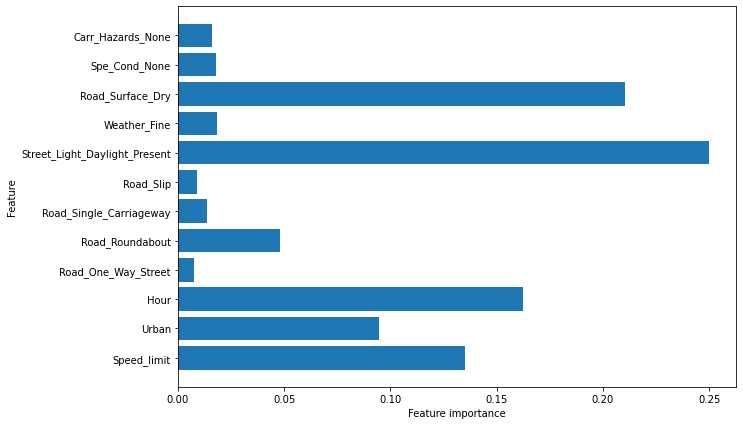

In [32]:
bt_clf0 = trained_bt_clfs[0]
plot_feature_importances(bt_clf0)

### Random Forest

In [33]:
# Import required ensemble module
from sklearn import ensemble

-----------------------------------------------------------------------------------------
Running Cross-Validation for model 'RandomForestClassifier(max_depth=8, n_estimators=10, random_state=8)' ...


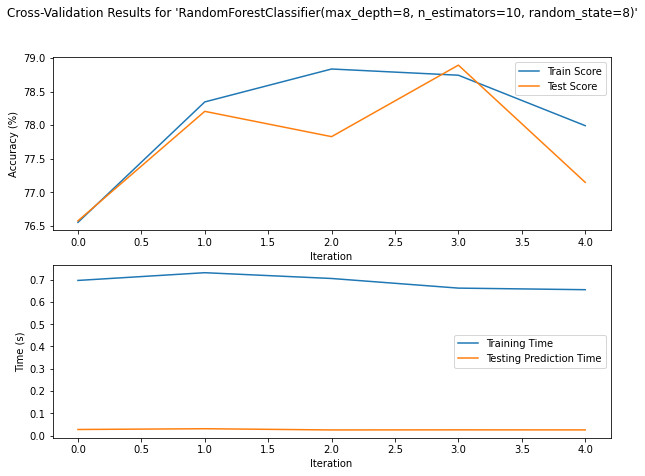

[Testing]  Accuracy Mean       (%) = 77.731
[Testing]  Accuracy Std Dev    (%) = 0.806
[Testing]  Execution Time Mean (s) = 0.027
[Training] Execution Time Mean (s) = 0.690
-----------------------------------------------------------------------------------------


In [34]:
# Configure Random-Forest model and invoke cross_validation function
rf_clf = ensemble.RandomForestClassifier(n_estimators=10, max_depth=8, random_state=8)
trained_bt_clfs = cross_validation(rf_clf)

### Linear SVM

In [35]:
# Import required SVM module
from sklearn import svm

-----------------------------------------------------------------------------------------
Running Cross-Validation for model 'LinearSVC(dual=False, random_state=18)' ...


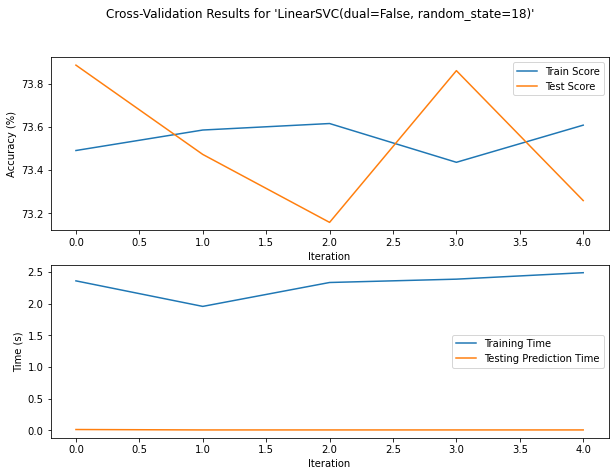

[Testing]  Accuracy Mean       (%) = 73.527
[Testing]  Accuracy Std Dev    (%) = 0.300
[Testing]  Execution Time Mean (s) = 0.008
[Training] Execution Time Mean (s) = 2.304
-----------------------------------------------------------------------------------------


In [36]:
# Configure Linear SVM model and invoke cross_validation function
lsvm_clf = svm.LinearSVC(dual=False, random_state=18)
trained_bt_clfs = cross_validation(lsvm_clf)